In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset with proper encoding handling
try:
    df = pd.read_csv('./EcommercePurchases.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('./EcommercePurchases.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv('./EcommercePurchases.csv', encoding='cp1252')

# Convert 'AM or PM' to datetime format and create a 'Hour' column
df['AM or PM'] = df['AM or PM'].str.strip()
df['Lot'] = pd.to_numeric(df['Lot'], errors='coerce')

# Handle NaN values in 'Lot' column
df['Lot'] = df['Lot'].fillna(0)

# Create 'Hour' column
df['Hour'] = df.apply(lambda row: (12 if row['AM or PM'] == 'PM' else 0) + int(row['Lot']), axis=1)
df['Hour'] = df['Hour'] % 24

C:\Users\aspur\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


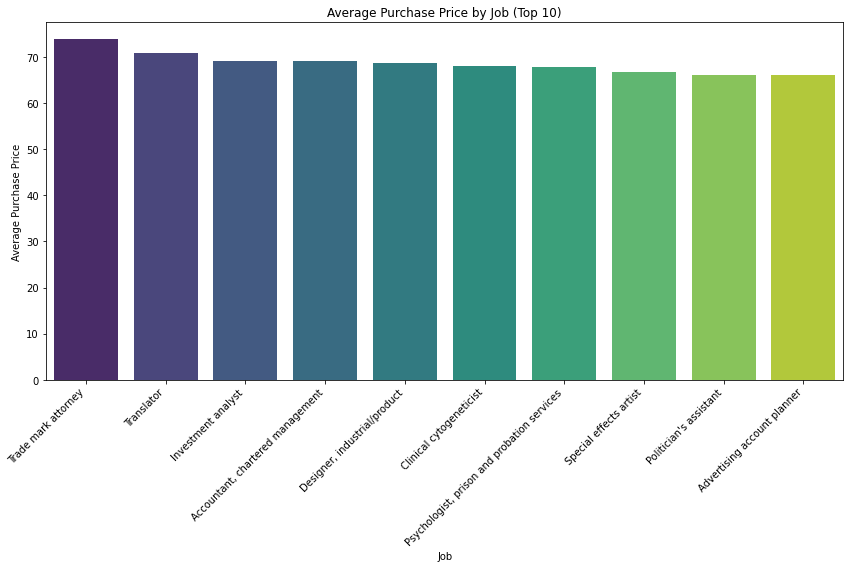

In [4]:
# 1. Bar Chart - Average Purchase Price by Job

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's already done)

# 1. Bar Chart - Average Purchase Price by Job
job_sales = df.groupby('Job')['Purchase Price'].mean().sort_values(ascending=False)

# Select the top N (e.g., top 10) jobs for better readability
top_n = 10
top_job_sales = job_sales.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_job_sales.index, y=top_job_sales.values, palette='viridis')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.title('Average Purchase Price by Job (Top 10)')
plt.xlabel('Job')
plt.ylabel('Average Purchase Price')
plt.tight_layout()

plt.show()


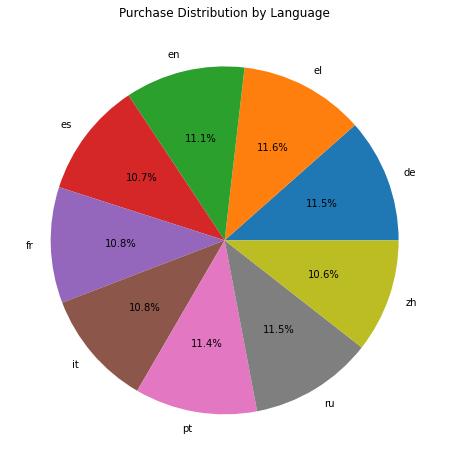

In [5]:
# 2. Pie Chart - Purchase Distribution by Language
language_sales = df.groupby('Language')['Purchase Price'].sum()
plt.figure(figsize=(10, 8))
plt.pie(language_sales, labels=language_sales.index, autopct='%1.1f%%')
plt.title('Purchase Distribution by Language')
plt.show()

C:\Users\aspur\AppData\Local\Temp\ipykernel_14676\799269604.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm)


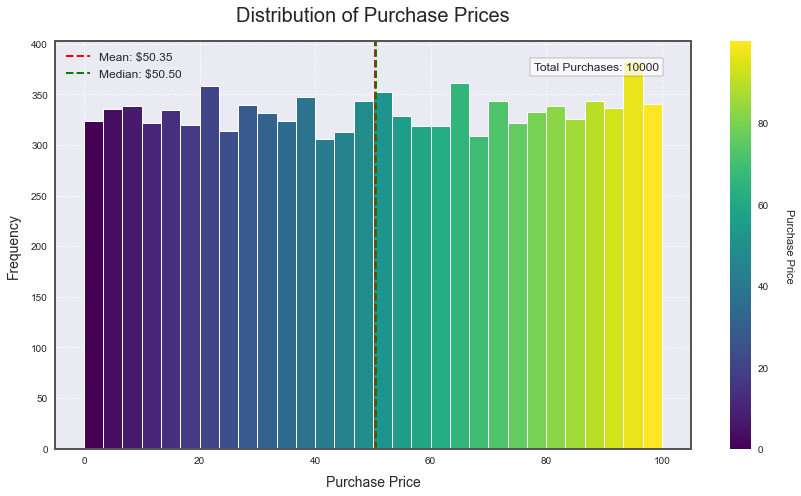

In [6]:
# 3. Histogram - Purchase Price Distribution
# Set the style for a more modern look
plt.style.use('seaborn')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 7))

# Create the histogram
n, bins, patches = ax.hist(df['Purchase Price'], bins=30, edgecolor='white', linewidth=1)

# Color gradient
cm = plt.cm.get_cmap('viridis')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(vmin=min(df['Purchase Price']), vmax=max(df['Purchase Price'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Purchase Price', rotation=270, labelpad=25)

# Customize the plot
ax.set_title('Distribution of Purchase Prices', fontsize=20, pad=20)
ax.set_xlabel('Purchase Price', fontsize=14, labelpad=10)
ax.set_ylabel('Frequency', fontsize=14, labelpad=10)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add a subtle box around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('#555555')
    spine.set_linewidth(2)

# Add mean and median lines
mean_price = df['Purchase Price'].mean()
median_price = df['Purchase Price'].median()
ax.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_price:.2f}')
ax.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: ${median_price:.2f}')

# Add legend
ax.legend(fontsize=12)

# Add text annotations
ax.text(0.95, 0.95, f'Total Purchases: {len(df)}', 
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

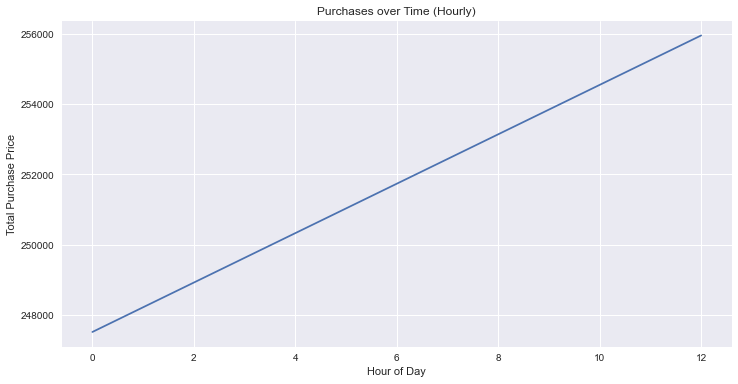

In [7]:
# 4. Timeline Chart - Purchases over Time (Hourly)
hourly_sales = df.groupby('Hour')['Purchase Price'].sum()
plt.figure(figsize=(12, 6))
hourly_sales.plot()
plt.title('Purchases over Time (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Purchase Price')
plt.show()

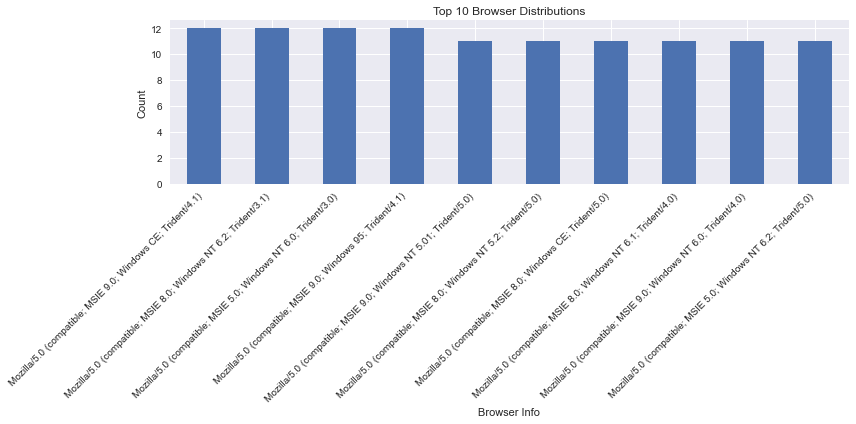

In [8]:
# 5. Bar Chart: Browser Info Distribution
plt.figure(figsize=(12, 6))
df['Browser Info'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Browser Distributions')
plt.xlabel('Browser Info')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

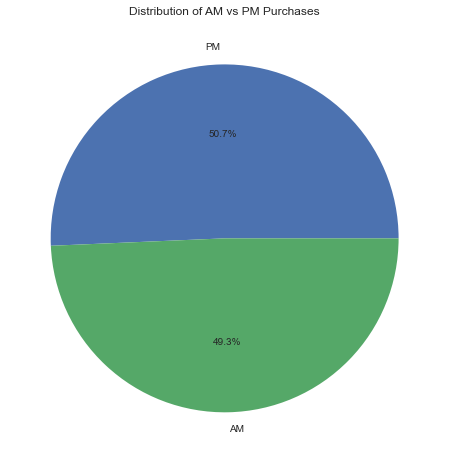

In [9]:
# 6. Pie Chart: AM/PM Distribution
plt.figure(figsize=(8, 8))
df['AM or PM'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of AM vs PM Purchases')
plt.ylabel('')
plt.show()


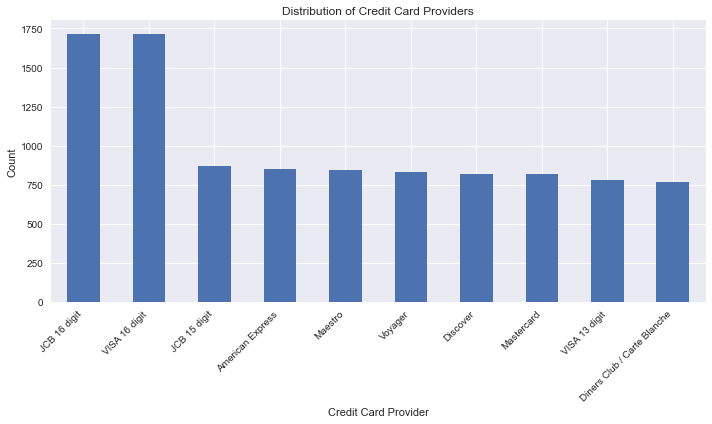

In [11]:
# 7. Bar Chart: Credit Card Provider Distribution
plt.figure(figsize=(10, 6))
df['CC Provider'].value_counts().plot(kind='bar')
plt.title('Distribution of Credit Card Providers')
plt.xlabel('Credit Card Provider')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

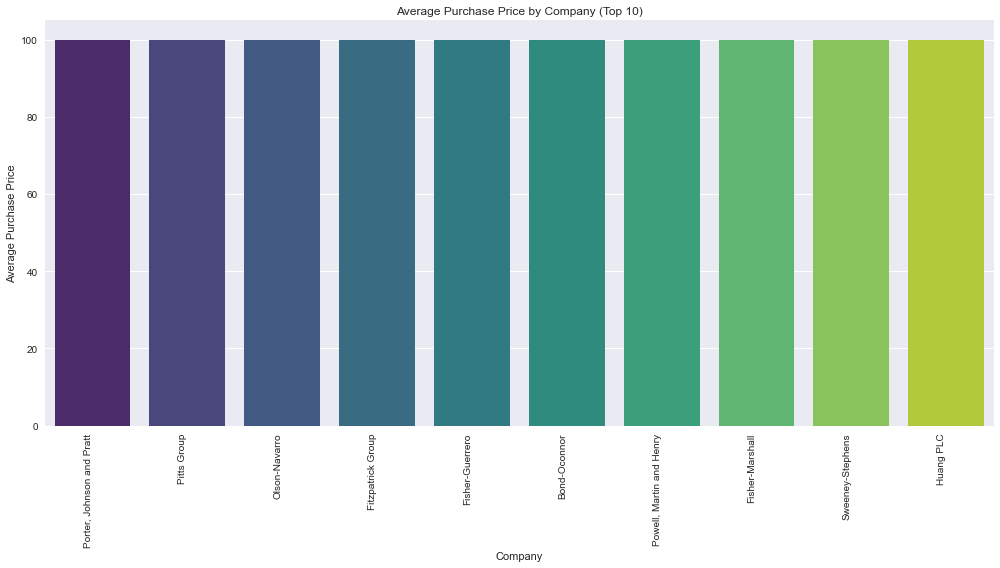

In [12]:
# 8. Bar Chart - Average Purchase Price by Company (Top 10)

# Calculate average purchase price by company
company_sales = df.groupby('Company')['Purchase Price'].mean().sort_values(ascending=False)

# Select the top 10 companies
top_company_sales = company_sales.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_company_sales.index, y=top_company_sales.values, palette='viridis')

# Rotate labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)

plt.title('Average Purchase Price by Company (Top 10)')
plt.xlabel('Company')
plt.ylabel('Average Purchase Price')
plt.tight_layout()

plt.show()

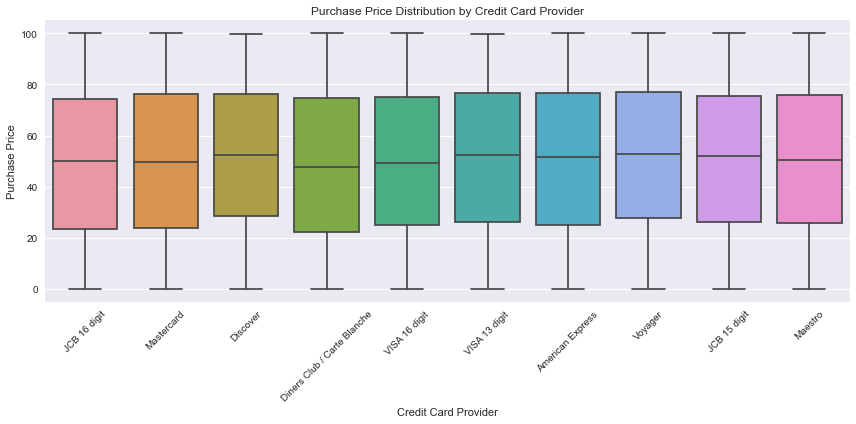

In [13]:
# 9. Boxplot: Purchase Price by Credit Card Provider
plt.figure(figsize=(12, 6))
sns.boxplot(x='CC Provider', y='Purchase Price', data=df)
plt.title('Purchase Price Distribution by Credit Card Provider')
plt.xlabel('Credit Card Provider')
plt.ylabel('Purchase Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

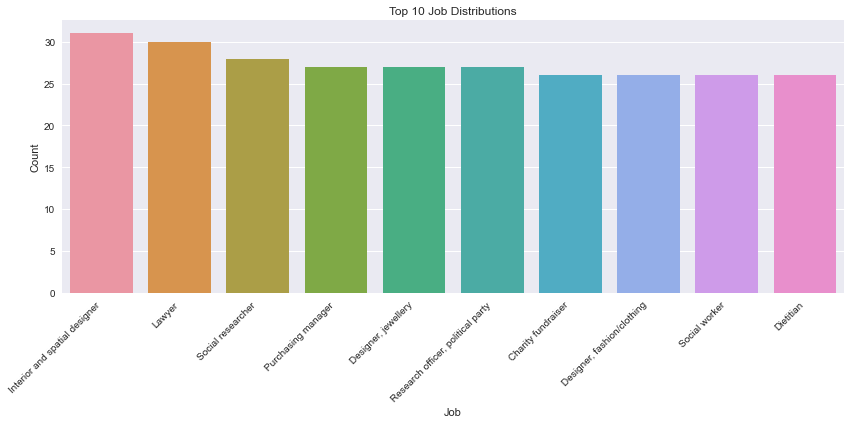

In [14]:
# 10. Countplot: Job Distribution
plt.figure(figsize=(12, 6))
job_counts = df['Job'].value_counts().head(10)
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Top 10 Job Distributions')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

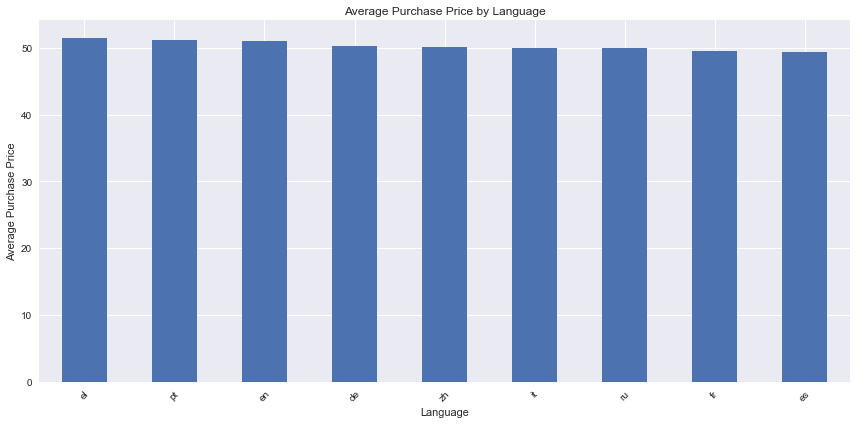

In [15]:
# 11. Bar Chart: Average Purchase Price by Language
avg_price_by_language = df.groupby('Language')['Purchase Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price_by_language.plot(kind='bar')
plt.title('Average Purchase Price by Language')
plt.xlabel('Language')
plt.ylabel('Average Purchase Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

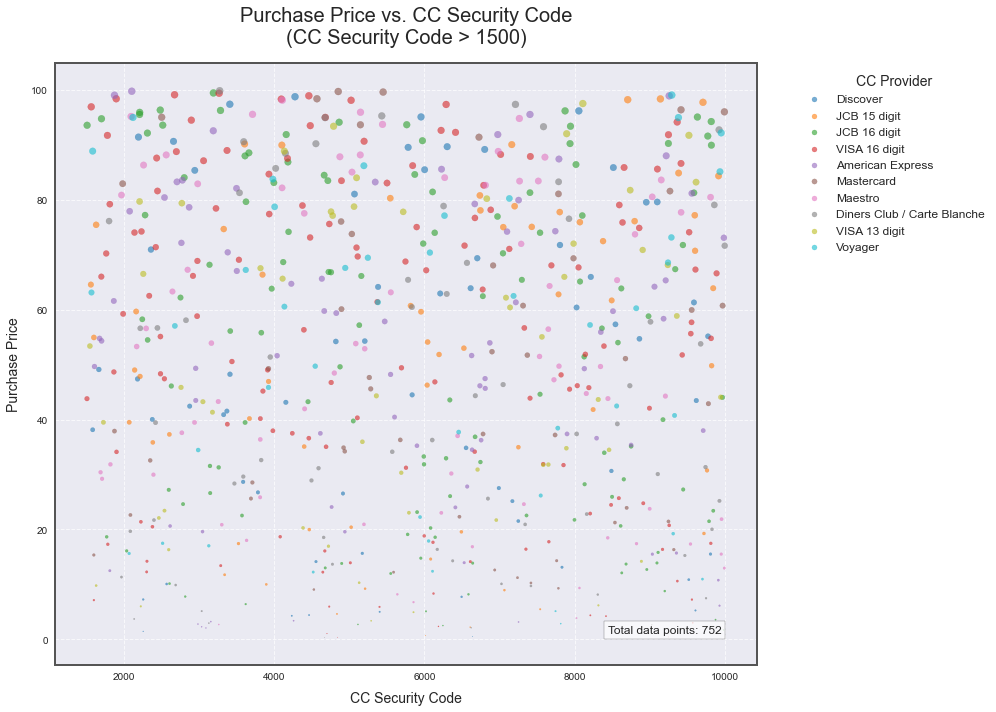

In [19]:
# 12. Bubble Plot: Purchase Price vs. CC Security Code, with CC Provider as color and Purchase Price as size
# Set the style for a more modern look
plt.style.use('seaborn')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 10))

# Filter the dataframe for CC Security Code > 1500
df_filtered = df[df['CC Security Code'] > 1500]

# Create a color map
color_map = plt.cm.get_cmap('tab10')
color_norm = plt.Normalize(vmin=0, vmax=len(df_filtered['CC Provider'].unique()))

for i, provider in enumerate(df_filtered['CC Provider'].unique()):
    provider_data = df_filtered[df_filtered['CC Provider'] == provider]
    ax.scatter(provider_data['CC Security Code'], 
               provider_data['Purchase Price'],
               s=provider_data['Purchase Price'] * 0.5,  # Size based on Purchase Price
               alpha=0.6,
               label=provider,
               color=color_map(color_norm(i)))

# Customize the plot
ax.set_title('Purchase Price vs. CC Security Code\n(CC Security Code > 1500)', fontsize=20, pad=20)
ax.set_xlabel('CC Security Code', fontsize=14, labelpad=10)
ax.set_ylabel('Purchase Price', fontsize=14, labelpad=10)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add a subtle box around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('#555555')
    spine.set_linewidth(2)

# Improve legend
ax.legend(title='CC Provider', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add text annotations
ax.text(0.95, 0.05, f'Total data points: {len(df_filtered)}', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

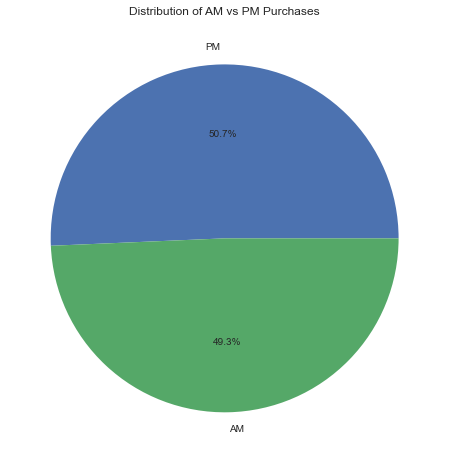

In [17]:
# 13. Pie Chart: AM/PM Distribution
plt.figure(figsize=(8, 8))
df['AM or PM'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of AM vs PM Purchases')
plt.ylabel('')
plt.show()

<Figure size 864x432 with 0 Axes>

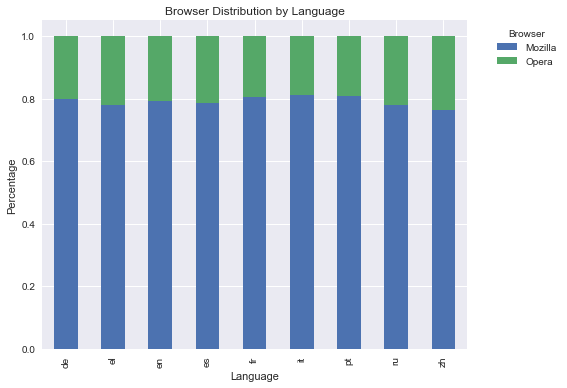

In [18]:
# 14. Stacked Bar Chart: Browser Distribution by Language
browser_lang = pd.crosstab(df['Language'], df['Browser Info'].str.split('/').str[0])
browser_lang_pct = browser_lang.div(browser_lang.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
browser_lang_pct.plot(kind='bar', stacked=True)
plt.title('Browser Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.legend(title='Browser', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()